Load HCP data and connectivity analysis.

# Plotting functions

# Data load

In [1]:
import os
import requests
import tarfile

# Definir directorios y archivos
local_dir = r"C:\Users\sebae\NMA_Project_2024\HCP_data"  # Cambia esta ruta al directorio que prefieras en tu máquina local
os.makedirs(local_dir, exist_ok=True)
fnames = ["hcp_rest.tgz", "hcp_covariates.tgz", "atlas.npz"]
urls = ["https://osf.io/bqp7m/download",
        "https://osf.io/x5p4g/download",
        "https://osf.io/j5kuc/download"]

# Función para descargar archivos
def download_file(url, fname):
    try:
        r = requests.get(url)
        r.raise_for_status()  # Check for HTTP errors
    except requests.ConnectionError:
        print("!!! Failed to download data: Connection Error !!!")
    except requests.HTTPError as err:
        print(f"!!! Failed to download data: HTTP Error {err} !!!")
    else:
        print(f"Downloading {fname}...")
        with open(fname, "wb") as fid:
            fid.write(r.content)
        print(f"Download {fname} completed!")

# Descargar los archivos si no existen en el directorio local
for fname, url in zip(fnames, urls):
    local_path = os.path.join(local_dir, fname)
    if not os.path.isfile(local_path):
        download_file(url, local_path)
    else:
        print(f"{fname} already exists in local directory.")

# Si necesitas extraer los archivos
def extract_file(filepath, extract_to):
    if tarfile.is_tarfile(filepath):
        with tarfile.open(filepath) as tar:
            tar.extractall(path=extract_to)
        print(f"Extracted {os.path.basename(filepath)} to {extract_to}")
    else:
        print(f"{os.path.basename(filepath)} is not a valid tar file.")

for fname in fnames:
    local_path = os.path.join(local_dir, fname)
    extract_file(local_path, local_dir)


Download C:\Users\sebae\NMA_Project_2024\HCP_data\hcp_rest.tgz completed!
Download C:\Users\sebae\NMA_Project_2024\HCP_data\hcp_covariates.tgz completed!
Download C:\Users\sebae\NMA_Project_2024\HCP_data\atlas.npz completed!


C:\Users\sebae\AppData\Local\Temp\ipykernel_8124\1444801391.py:40: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_to)


Extracted hcp_rest.tgz to C:\Users\sebae\NMA_Project_2024\HCP_data
Extracted hcp_covariates.tgz to C:\Users\sebae\NMA_Project_2024\HCP_data
atlas.npz is not a valid tar file.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Necessary for visualization
from nilearn import plotting, datasets

In [3]:
# The download cells will store the data in nested directories starting here:
HCP_DIR = r"C:\Users\sebae\NMA_Project_2024\HCP_data"
if not os.path.isdir(HCP_DIR):
  os.mkdir(HCP_DIR)

# The data shared for NMA projects is a subset of the full HCP dataset
N_SUBJECTS = 339

# The data have already been aggregated into ROIs from the Glasesr parcellation
N_PARCELS = 360

# The acquisition parameters for all tasks were identical
TR = 0.72  # Time resolution, in sec

# The parcels are matched across hemispheres with the same order
HEMIS = ["Right", "Left"]

# Each experiment was repeated multiple times in each subject
N_RUNS_REST = 4
N_RUNS_TASK = 2

# Time series data are organized by experiment, with each experiment
# having an LR and RL (phase-encode direction) acquistion
BOLD_NAMES = [
  "rfMRI_REST1_LR", "rfMRI_REST1_RL",
  "rfMRI_REST2_LR", "rfMRI_REST2_RL",
  "tfMRI_MOTOR_RL", "tfMRI_MOTOR_LR",
  "tfMRI_WM_RL", "tfMRI_WM_LR",
  "tfMRI_EMOTION_RL", "tfMRI_EMOTION_LR",
  "tfMRI_GAMBLING_RL", "tfMRI_GAMBLING_LR",
  "tfMRI_LANGUAGE_RL", "tfMRI_LANGUAGE_LR",
  "tfMRI_RELATIONAL_RL", "tfMRI_RELATIONAL_LR",
  "tfMRI_SOCIAL_RL", "tfMRI_SOCIAL_LR"
]

# You may want to limit the subjects used during code development.
# This will use all subjects:
subjects = range(N_SUBJECTS)

(array([ 1.,  0.,  7.,  9., 15., 53., 57., 71., 64., 62.]),
 array([ 4.58928571,  5.3875    ,  6.18571429,  6.98392857,  7.78214286,
         8.58035714,  9.37857143, 10.17678571, 10.975     , 11.77321429,
        12.57142857]),
 <BarContainer object of 10 artists>)

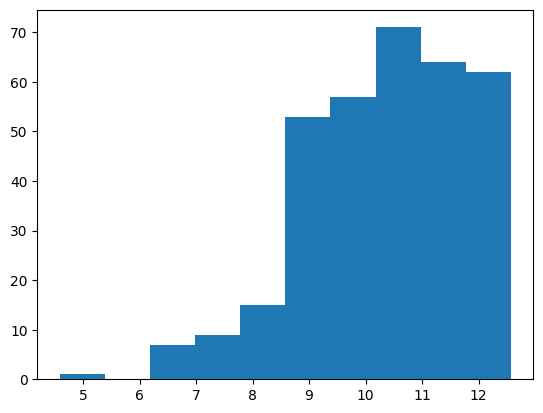

In [5]:
import pandas as pd
language_csv = r'C:\Users\sebae\NMA_Project_2024\HCP_data\hcp\behavior\language.csv'
language_df = pd.read_csv(language_csv)
filtered_df = language_df[language_df['ConditionName'] == 'STORY']
filtered_df
run_mean = filtered_df.groupby('Subject')[['ACC', 'AVG_DIFFICULTY_LEVEL', 'MEDIAN_RT']].mean().reset_index()

avg_dif_df = run_mean[['Subject', 'AVG_DIFFICULTY_LEVEL']]

avg_dif_df.head()

#plt.hist(run_mean['ACC'])
plt.hist(run_mean['AVG_DIFFICULTY_LEVEL'])




In [6]:
# Definir el umbral
threshold = 10.5

# Filtrar los datos por debajo del umbral
below_threshold_df = run_mean[run_mean['AVG_DIFFICULTY_LEVEL'] < threshold]

# Filtrar los datos por encima o iguales al umbral
above_threshold_df = run_mean[run_mean['AVG_DIFFICULTY_LEVEL'] >= threshold]

# Mostrar los resultados
print("Below threshold:")
print(below_threshold_df)

print("\n above the threshold:")
print(above_threshold_df)


Below threshold:
     Subject    ACC  AVG_DIFFICULTY_LEVEL  MEDIAN_RT
0          0  0.875              8.892857    2880.75
1          1  1.000             10.089286    3205.50
2          2  1.000             10.053571    3104.00
3          3  0.750              8.767857    3317.75
4          4  0.875              9.357143    3799.50
..       ...    ...                   ...        ...
332      332  1.000              9.053571    3063.75
333      333  0.875             10.178571    3642.25
335      335  0.875              8.750000    3575.75
336      336  0.875              9.464286    4274.00
338      338  1.000              9.375000    3490.50

[176 rows x 4 columns]

 above the threshold:
     Subject    ACC  AVG_DIFFICULTY_LEVEL  MEDIAN_RT
5          5  0.875             11.107143    3109.50
8          8  1.000             11.928571    3768.25
11        11  1.000             10.821429    3314.75
13        13  0.875             10.750000    3148.50
15        15  0.875             10.

In [7]:
# Crear una nueva columna 'LABEL' basada en la condición del umbral
run_mean['LABEL'] = (run_mean['AVG_DIFFICULTY_LEVEL'] >= threshold).astype(int)

# Filtrar los datos por debajo del umbral
below_threshold_df = run_mean[run_mean['LABEL'] == 0]

# Filtrar los datos por encima o iguales al umbral
above_threshold_df = run_mean[run_mean['LABEL'] == 1]

# Mostrar los resultados
print("Below threshold:")
print(below_threshold_df)

print("\nAbove the threshold:")
print(above_threshold_df)

Below threshold:
     Subject    ACC  AVG_DIFFICULTY_LEVEL  MEDIAN_RT  LABEL
0          0  0.875              8.892857    2880.75      0
1          1  1.000             10.089286    3205.50      0
2          2  1.000             10.053571    3104.00      0
3          3  0.750              8.767857    3317.75      0
4          4  0.875              9.357143    3799.50      0
..       ...    ...                   ...        ...    ...
332      332  1.000              9.053571    3063.75      0
333      333  0.875             10.178571    3642.25      0
335      335  0.875              8.750000    3575.75      0
336      336  0.875              9.464286    4274.00      0
338      338  1.000              9.375000    3490.50      0

[176 rows x 5 columns]

Above the threshold:
     Subject    ACC  AVG_DIFFICULTY_LEVEL  MEDIAN_RT  LABEL
5          5  0.875             11.107143    3109.50      1
8          8  1.000             11.928571    3768.25      1
11        11  1.000             10.82

# MATRIX LOADING

In [8]:
def get_image_ids(name):
  """Get the 1-based image indices for runs in a given experiment.

    Args:
      name (str) : Name of experiment ("rest" or name of task) to load
    Returns:
      run_ids (list of int) : Numeric ID for experiment image files

  """
  run_ids = [
             i for i, code in enumerate(BOLD_NAMES, 1) if name.upper() in code
             ]
  if not run_ids:
    raise ValueError(f"Found no data for '{name}'")
  return run_ids


def load_timeseries(subject, name, dir,
                    runs=None, concat=True, remove_mean=True):
  """Load timeseries data for a single subject.

  Args:
    subject (int): 0-based subject ID to load
    name (str) : Name of experiment ("rest" or name of task) to load
    dir (str) : data directory
    run (None or int or list of ints): 0-based run(s) of the task to load,
      or None to load all runs.
    concat (bool) : If True, concatenate multiple runs in time
    remove_mean (bool) : If True, subtract the parcel-wise mean

  Returns
    ts (n_parcel x n_tp array): Array of BOLD data values

  """
  # Get the list relative 0-based index of runs to use
  if runs is None:
    runs = range(N_RUNS_REST) if name == "rest" else range(N_RUNS_TASK)
  elif isinstance(runs, int):
    runs = [runs]

  # Get the first (1-based) run id for this experiment
  offset = get_image_ids(name)[0]

  # Load each run's data
  bold_data = [
               load_single_timeseries(subject,
                                      offset + run,
                                      dir,
                                      remove_mean) for run in runs
               ]

  # Optionally concatenate in time
  if concat:
    bold_data = np.concatenate(bold_data, axis=-1)

  return bold_data


def load_single_timeseries(subject, bold_run, dir, remove_mean=True):
  """Load timeseries data for a single subject and single run.

  Args:
    subject (int): 0-based subject ID to load
    bold_run (int): 1-based run index, across all tasks
    dir (str) : data directory
    remove_mean (bool): If True, subtract the parcel-wise mean

  Returns
    ts (n_parcel x n_timepoint array): Array of BOLD data values

  """
  bold_path = os.path.join(dir, "subjects", str(subject), "timeseries")
  bold_file = f"bold{bold_run}_Atlas_MSMAll_Glasser360Cortical.npy"
  ts = np.load(os.path.join(bold_path, bold_file))
  if remove_mean:
    ts -= ts.mean(axis=1, keepdims=True)
  return ts


def load_evs(subject, name, condition, dir):
  """Load EV (explanatory variable) data for one task condition.

  Args:
    subject (int): 0-based subject ID to load
    name (str) : Name of task
    condition (str) : Name of condition
    dir (str) : data directory

  Returns
    evs (list of dicts): A dictionary with the onset, duration, and amplitude
      of the condition for each run.

  """
  evs = []
  for id in get_image_ids(name):
    task_key = BOLD_NAMES[id - 1]
    ev_file = os.path.join(dir, "subjects", str(subject), "EVs",
                           task_key, f"{condition}.txt")
    ev_array = np.loadtxt(ev_file, ndmin=2, unpack=True)
    ev = dict(zip(["onset", "duration", "amplitude"], ev_array))
    evs.append(ev)
  return evs

Extract and concatenate timeseries

In [9]:
timeseries = load_timeseries(subject=0,
                             name="rest",
                             dir=os.path.join(HCP_DIR, "hcp_rest"),
                             runs=1)
print(timeseries.shape)  # n_parcel x n_timepoint

(360, 1200)


In [10]:
timeseries_rest = []
for subject in subjects:
  ts_concat = load_timeseries(subject, name="rest",
                              dir=os.path.join(HCP_DIR, "hcp_rest"))
  timeseries_rest.append(ts_concat)

Construct functional connectivity matrix (FC)

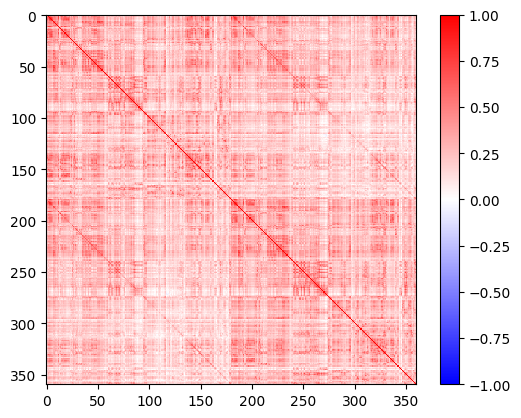

In [11]:
f_connectivity_matrix = np.zeros((N_SUBJECTS, N_PARCELS, N_PARCELS))
for sub, ts in enumerate(timeseries_rest):
  f_connectivity_matrix[sub] = np.corrcoef(ts)

group_fc = f_connectivity_matrix.mean(axis=0)

plt.figure()
plt.imshow(group_fc, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

In [12]:
lower_triangle = np.tril(f_connectivity_matrix, k=-1)

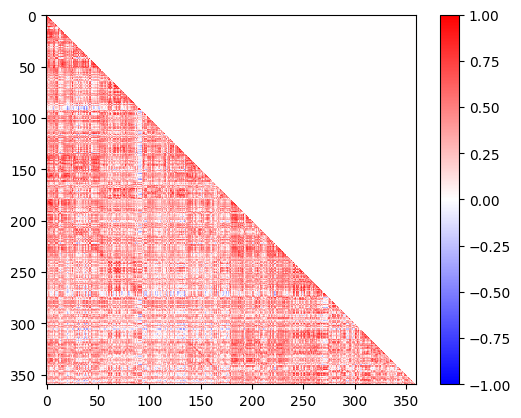

In [13]:
group_fc_lower = lower_triangle.mean(axis=0)
plt.figure()
plt.imshow(lower_triangle[1,:,:], interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

# PCA and tSNE



# Screeplot

# TA advise: define a function that thresholds the accuracy. make a vector of n_subjects and assing the label 0 or 1 based on a threshold, (we can have more groups but less group the model will perform better)

C:\Users\sebae\AppData\Local\Temp\ipykernel_8124\1501346827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_dif_df['Label'] = assign_labels(avg_dif_df, 'AVG_DIFFICULTY_LEVEL', threshold)


     Subject  AVG_DIFFICULTY_LEVEL  Label
0          0              8.892857      0
1          1             10.089286      0
2          2             10.053571      0
3          3              8.767857      0
4          4              9.357143      0
..       ...                   ...    ...
334      334             12.446429      1
335      335              8.750000      0
336      336              9.464286      0
337      337             11.178571      1
338      338              9.375000      0

[339 rows x 3 columns]


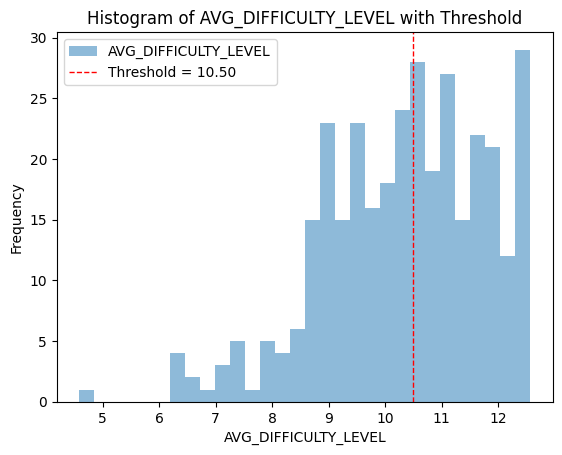

[0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1
 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0
 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 0]


In [14]:
# Función para asignar etiquetas basadas en un umbral
def assign_labels(dataframe, column, threshold):
    labels = (dataframe[column] > threshold).astype(int)
    return labels

# Asignar etiquetas
avg_dif_df['Label'] = assign_labels(avg_dif_df, 'AVG_DIFFICULTY_LEVEL', threshold)

# Mostrar el DataFrame con las etiquetas
print(avg_dif_df)

# Crear un histograma de 'AVG_DIFFICULTY_LEVEL' con etiquetas
plt.hist(avg_dif_df['AVG_DIFFICULTY_LEVEL'], bins=30, alpha=0.5, label='AVG_DIFFICULTY_LEVEL')
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=1, label=f'Threshold = {threshold:.2f}')
plt.xlabel('AVG_DIFFICULTY_LEVEL')
plt.ylabel('Frequency')
plt.title('Histogram of AVG_DIFFICULTY_LEVEL with Threshold')
plt.legend()
plt.show()

# Vector de etiquetas
labels_vector = avg_dif_df['Label'].values
print(labels_vector)

In [15]:
# Suponiendo que ya has calculado la matriz de conectividad grupal
# group_fc tiene dimensiones (N_PARCELS, N_PARCELS)

# Aplanar la matriz de conectividad funcional para cada sujeto
lower_triangle_indices = np.tril_indices(N_PARCELS, k=-1)
flat_fc = [fc[lower_triangle_indices] for fc in f_connectivity_matrix]

# Convertir a un array de numpy
flat_fc = np.array(flat_fc)

print(flat_fc.shape)  # Debería ser (N_SUBJECTS, N_PARCELS*(N_PARCELS-1)/2)


(339, 64620)


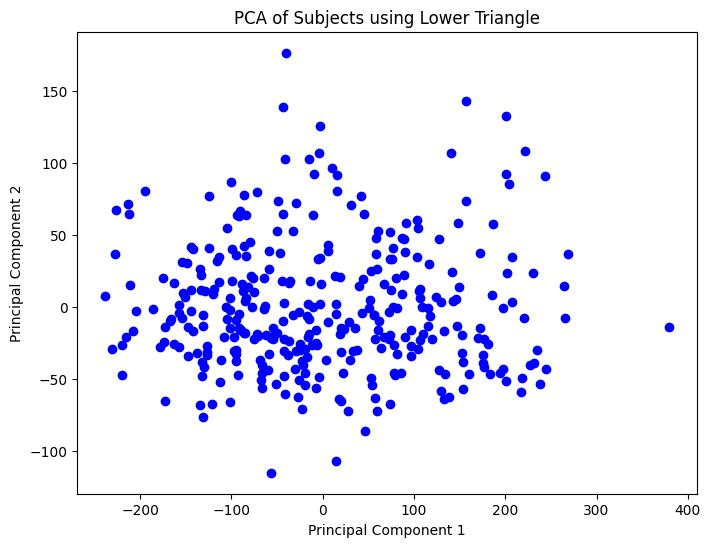

In [16]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(flat_fc)

# Step 3: Perform PCA
pca = PCA(n_components=50)  # You can adjust the number of components
principal_components = pca.fit_transform(standardized_data)

# Step 4: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Subjects using Lower Triangle')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_


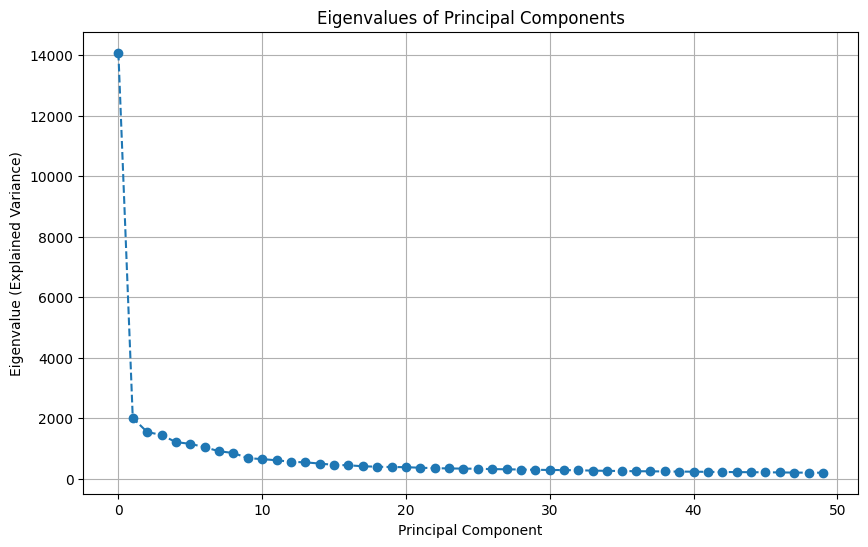

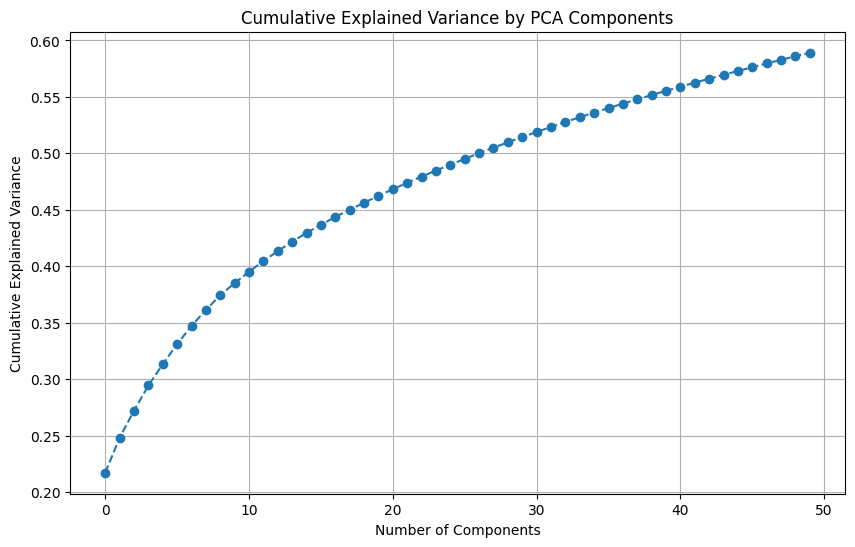

In [17]:
# # # Explained variance
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# # # Plot eigenvalues (explained variance)
plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Eigenvalues of Principal Components')
plt.grid(True)
plt.show()

# # # Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [18]:
# Find the number of components needed to explain 90% of the variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(explained_variance_ratio >= 0.90) + 1
n_components_75 = np.argmax(explained_variance_ratio >= 0.75) + 1
n_components_50 = np.argmax(explained_variance_ratio >= 0.50) + 1



print(f"Number of components to retain 90% variance: {n_components_90}")
print(f"Number of components to retain 75% variance: {n_components_75}")
print(f"Number of components to retain 50% variance: {n_components_50}")

Number of components to retain 90% variance: 1
Number of components to retain 75% variance: 1
Number of components to retain 50% variance: 27


we can try to do a linear regression to predict the avg_difficult instead of a clasiffier and we won't need the labels

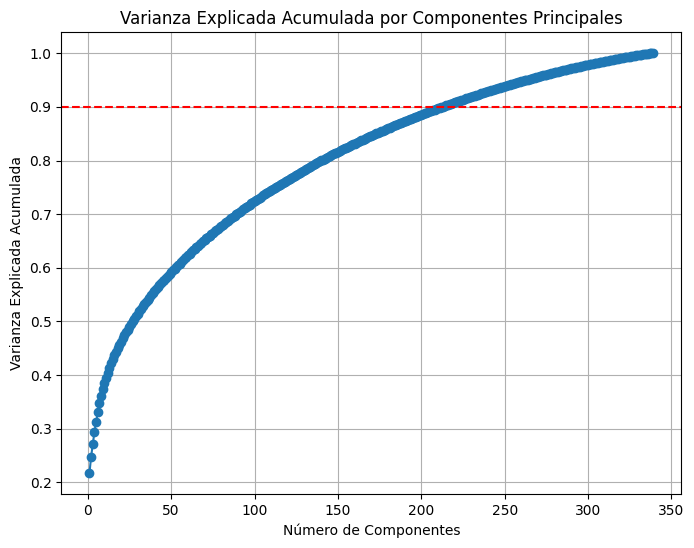

In [19]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supongamos que tienes datos escalados X_scaled

# Aplicar PCA sin especificar el número de componentes
pca = PCA()
pca.fit(standardized_data)

# Obtener la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')  # Línea para 90% de varianza explicada
plt.show()


# t-SNE

# The model starts here

In [20]:
avg_dif_df

,Subject,AVG_DIFFICULTY_LEVEL,Label
0,0,8.892857,0
1,1,10.089286,0
2,2,10.053571,0
3,3,8.767857,0
4,4,9.357143,0
...,...,...,...
334,334,12.446429,1
335,335,8.750000,0
336,336,9.464286,0
337,337,11.178571,1


In [21]:
labels_vector = run_mean['LABEL'].values
print(labels_vector)
print(labels_vector.shape)



[0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1
 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0
 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 0]
(339,)


In [22]:
principal_components

array([[ 2.64627240e+02,  1.44696243e+01,  1.87425328e+01, ...,
         1.17365063e+01,  1.45746302e+01,  8.32199747e+00],
       [ 8.67112886e+01,  9.06313945e+00, -2.57070077e+00, ...,
         6.62290242e+00, -1.29700620e+01,  1.11926524e+01],
       [-1.48460283e+01, -1.89793233e+01,  5.17378561e+01, ...,
         8.99845060e+00,  1.41480470e+01, -1.09079759e+00],
       ...,
       [ 1.52455994e+02, -3.19732709e+01, -1.36066471e+00, ...,
        -4.11850388e+00,  6.70276445e+00,  3.19886645e+00],
       [-9.18736031e+01,  6.32505302e+01, -7.06858150e+00, ...,
        -1.49555927e-01,  1.17673783e+00,  9.21403350e+00],
       [-2.66237160e+01, -6.26886572e+01,  2.14401846e+01, ...,
         3.99865667e+00, -6.65478554e+00, -1.22483718e+01]])

# try other models
random forest, decision making trees, svm,
feature selection (other than pca)
knearest neighbour


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming principal_components is your feature data and y is your target variable
X = principal_components
y = labels_vector  # Replace with your actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# Initialize the classifier
classifier = LogisticRegression(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(matrix)


Accuracy: 0.6911764705882353
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68        29
           1       0.78      0.64      0.70        39

    accuracy                           0.69        68
   macro avg       0.70      0.70      0.69        68
weighted avg       0.71      0.69      0.69        68

Confusion Matrix:
[[22  7]
 [14 25]]


In [24]:
print(principal_components.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 50)
(271, 50)
(68, 50)
(271,)
(68,)


# Plots

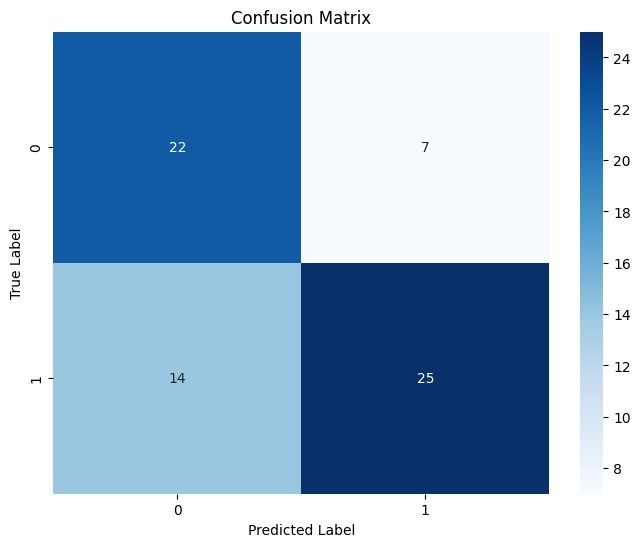

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Model Validation

k fold validation,

In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')


Cross-validation scores: [0.58823529 0.64705882 0.5        0.60294118 0.41791045]
Mean CV score: 0.5512291483757682


# Feature Importance

Feature Importance:
Feature 48: 0.02932490357707093
Feature 22: 0.02832171435224656
Feature 23: 0.021475425018049322
Feature 16: 0.020051542360049152
Feature 46: 0.017960097551696273
Feature 36: 0.016639280616419522
Feature 26: 0.01625234348194334
Feature 45: 0.016055157391734017
Feature 47: 0.01554994421572862
Feature 25: 0.015100200796751798
Feature 5: 0.013649726432932874
Feature 17: 0.01360237665441423
Feature 19: 0.013125510120833616
Feature 39: 0.01310448049759705
Feature 43: 0.011260853963295604
Feature 14: 0.010671135470838
Feature 4: 0.010480472547348803
Feature 13: 0.008957511066347049
Feature 33: 0.008151544594727955
Feature 2: 0.008135029446292508
Feature 37: 0.007245183108602985
Feature 9: 0.006647425833473127
Feature 30: 0.006502243569822303
Feature 24: 0.006274379893053437
Feature 41: 0.006129402281534878
Feature 20: 0.0059284428150283034
Feature 29: 0.005745072779041543
Feature 32: 0.005652315265548265
Feature 34: 0.005125674552053077
Feature 11: 0.004685659421834081
Fe

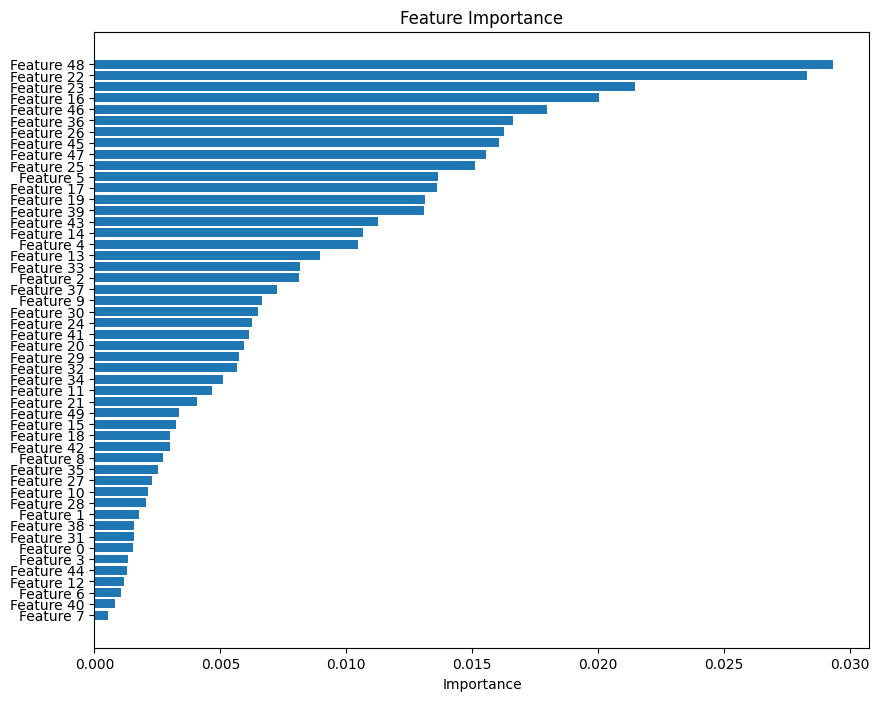

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance for logistic regression
if hasattr(classifier, 'coef_'):
    importance = np.abs(classifier.coef_[0])
    feature_names = [f'Feature {i}' for i in range(X.shape[1])]
    feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)

    print('Feature Importance:')
    for feature, importance in feature_importance:
        print(f'{feature}: {importance}')

    # Plot feature importance
    feature_names, importances = zip(*feature_importance)
    plt.figure(figsize=(10, 8))
    plt.barh(feature_names, importances, align='center')
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at the top
    plt.show()
else:
    print('The classifier does not have a `coef_` attribute.')

# XGboost


C:\Users\sebae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:09:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5735294117647058


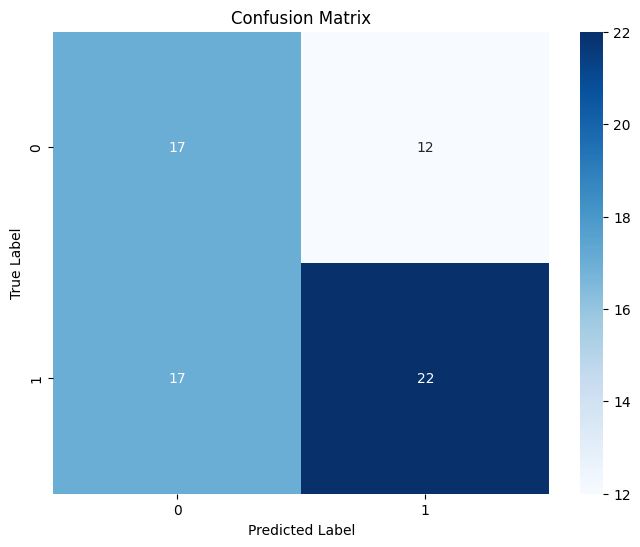

In [28]:
from xgboost import XGBClassifier

# Initialize the classifier
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Grid Search XGboost

In [29]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [1, 1.5, 2]
# }

# # Initialize the classifier
# classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# print(f'Best Parameters: {grid_search.best_params_}')
# print(f'Best Score: {grid_search.best_score_}')

# # Use the best estimator to make predictions
# best_classifier = grid_search.best_estimator_
# y_pred = best_classifier.predict(X_test)

# # Evaluate the classifiergit
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')


C:\Users\sebae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:09:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sebae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:09:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sebae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarnin

KeyboardInterrupt: 

# elbow kmeans

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Using t-SNE results with perplexity=30 for clustering
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features)

# Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_result)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


NameError: name 'TSNE' is not defined

# Random forest

In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train, y_train, X_test, and y_test defined

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5147058823529411


# Silhouette Score

In [32]:
from sklearn.metrics import silhouette_score

# Silhouette Score Method
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(tsne_result)
    silhouette_scores.append(silhouette_score(tsne_result, labels))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()


NameError: name 'tsne_result' is not defined

In [33]:
from sklearn.cluster import KMeans

# Using t-SNE results with perplexity=30 for clustering
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features)

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(tsne_result)

# Add cluster labels to the run_mean DataFrame
run_mean['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('t-SNE with K-means Clustering (k=3)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, orientation='horizontal', label='Cluster Label')
plt.grid(True)
plt.show()

# Analyze the clusters
cluster_summary = run_mean.groupby('Cluster')[['ACC', 'AVG_DIFFICULTY_LEVEL', 'MEDIAN_RT']].mean()
print(cluster_summary)

print('Cluster 0 (Cyan), Cluster 1 (Yellow), Cluster 2 (Purple)')

NameError: name 'TSNE' is not defined

          Subject         ACC  AVG_DIFFICULTY_LEVEL    MEDIAN_RT       LABEL
count  339.000000  339.000000            339.000000   339.000000  339.000000
mean   169.000000    0.945551             10.344764  3308.631268    0.480826
std     98.005102    0.081906              1.462082   326.217813    0.500371
min      0.000000    0.500000              4.589286  2486.000000    0.000000
25%     84.500000    0.875000              9.383929  3067.250000    0.000000
50%    169.000000    1.000000             10.464286  3268.250000    0.000000
75%    253.500000    1.000000             11.500000  3490.500000    1.000000
max    338.000000    1.000000             12.571429  4476.500000    1.000000


KeyError: 'Cluster'

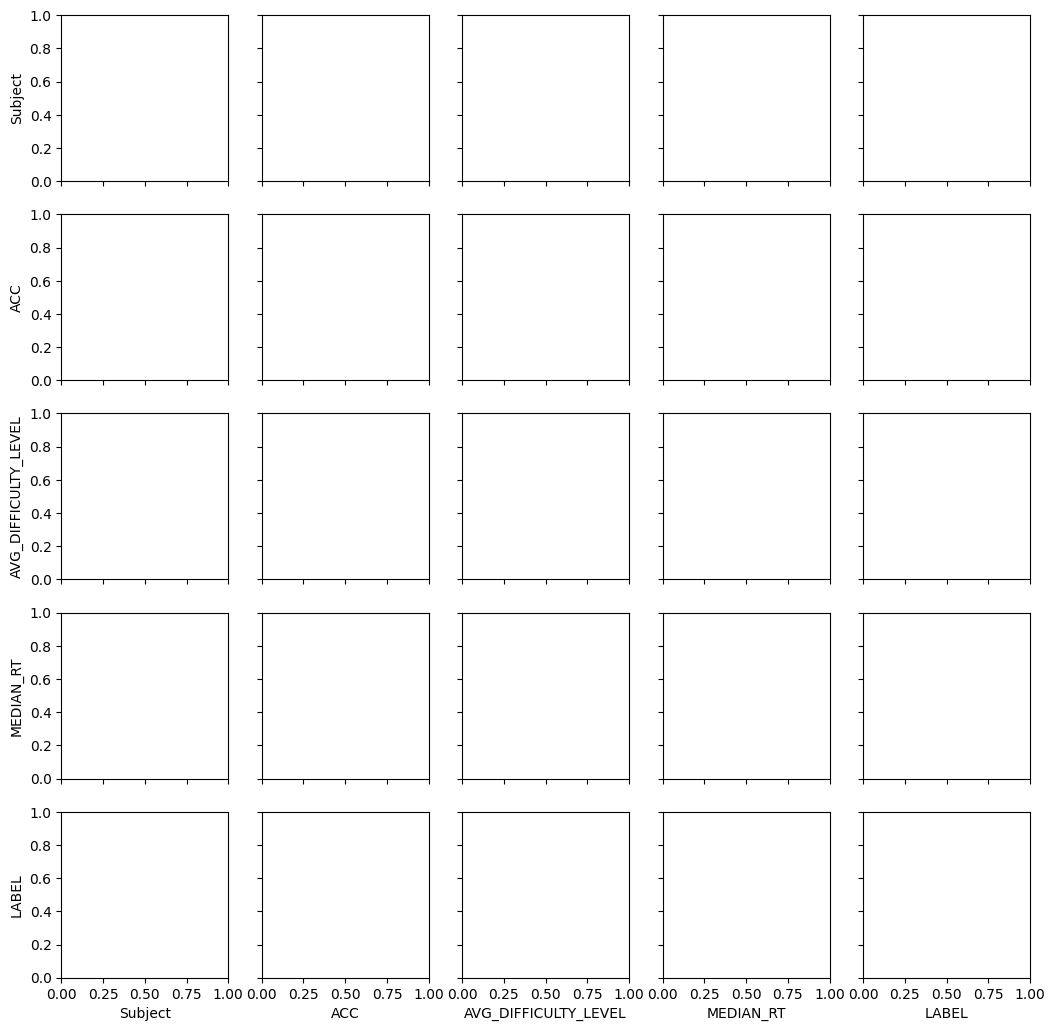

In [34]:
# Describe the data to check for anomalies
print(run_mean.describe())

# Plot the features to check for anomalies
import seaborn as sns

sns.pairplot(run_mean, hue='Cluster')
plt.show()


In [ ]:
# Check for correlations
correlation_matrix = run_mean.corr()
print(correlation_matrix)

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Drop one of each pair of highly correlated features if necessary
# For example, if ACC and AVG_DIFFICULTY_LEVEL are highly correlated, you might drop one.


In [ ]:
# Check for class imbalance
print(run_mean['Cluster'].value_counts())

# Visualize the class distribution
sns.countplot(x='Cluster', data=run_mean)
plt.title('Class Distribution')
plt.show()


# Single person connectivity matrix

# Autoencoder

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Assuming N_SUBJECTS and N_PARCELS are defined elsewhere

# Reshape fc array (choose your preferred method)
fc_reshaped = fc.reshape(N_SUBJECTS, -1)  # Flatten the entire connectivity matrix

# Define Autoencoder Model
class Autoencoder(tf.keras.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Flatten(input_shape=(fc_reshaped.shape[1],)),  # Adjust for your reshaping method
      layers.Dense(128, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(latent_dim, activation="relu"),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(fc_reshaped.shape[1]),  # Adjust for your reshaping method
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

# Define Hyperparameters (adjust as needed)
latent_dim = 32  # Dimensionality of the latent space
epochs = 100
batch_size = 32

# Create the Autoencoder model
model = Autoencoder(latent_dim)

# Compile the model
model.compile(optimizer="adam", loss="mse")

# Train the model
model.fit(fc_reshaped, fc_reshaped, epochs=epochs, batch_size=batch_size)

# Extract Latent Features (optional)
latent_features = model.encoder.predict(fc_reshaped)


# SVM

Accuracy: 0.7352941176470589
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        29
           1       0.82      0.69      0.75        39

    accuracy                           0.74        68
   macro avg       0.74      0.74      0.73        68
weighted avg       0.75      0.74      0.74        68



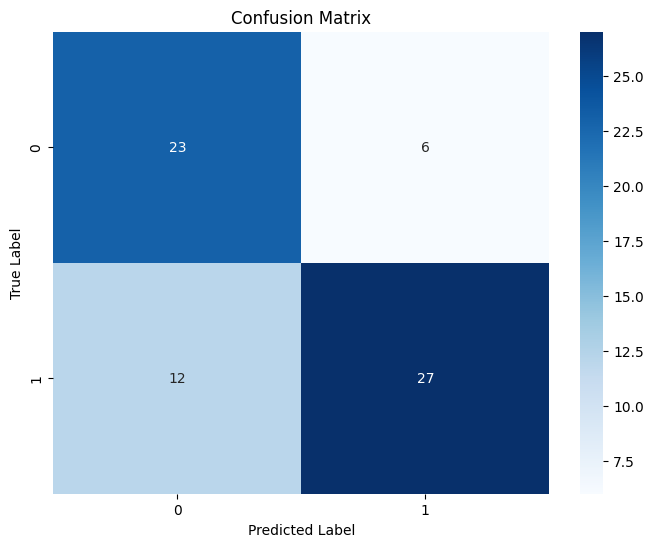

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que principal_components es tu conjunto de características y y es tu variable objetivo
X = principal_components
y = labels_vector  # Reemplaza con tu variable objetivo real

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# Inicializar el clasificador SVM
classifier = SVC(kernel='linear', random_state=42)

# Entrenar el clasificador
classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred = classifier.predict(X_test)

# Evaluar el clasificador
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Matriz de confusión
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Suponiendo que principal_components es tu conjunto de características y y es tu variable objetivo
X = principal_components
y = labels_vector  # Reemplaza con tu variable objetivo real

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# Definir la cuadrícula de parámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Crear el clasificador SVM
classifier = SVC(random_state=42)

# Inicializar GridSearchCV sin barra de progreso
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con barra de progreso
n_candidates = len(param_grid['C']) * len(param_grid['kernel']) * len(param_grid['gamma'])
with tqdm(total=n_candidates) as pbar:
    for i in range(n_candidates):
        pbar.update()
        grid_search.fit(X_train, y_train)

# Mejores parámetros y puntuación
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Usar el mejor estimador para hacer predicciones
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

# Evaluar el clasificador
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Matriz de confusión
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_classifier.classes_, yticklabels=best_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


  0%|          | 0/32 [00:00<?, ?it/s]